# Project: Earnings Based on College Majors

This is the third DataQuest project. It is based on a dataset of earnings data of recent college graduates. The main focus of the project is on data visualization.

In this project the dataset will be analyzed to find answers to the following questions:

* Do students in more popular majors make more money?
* How many majors are predominantly male? Female?
* Which category of majors have the most students

Import modules, load in the dataset and get a first overview over the data:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

recent_grads = pd.read_csv('recent-grads.csv')

print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())
print(recent_grads.shape)
recent_grads = recent_grads.dropna()
print(recent_grads.shape)


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

# Scatter Plots

Plot the amount of students interviewed against the amount of employed in a scatter plot:

Text(0.5, 1.0, 'Employed vs. Sample_size')

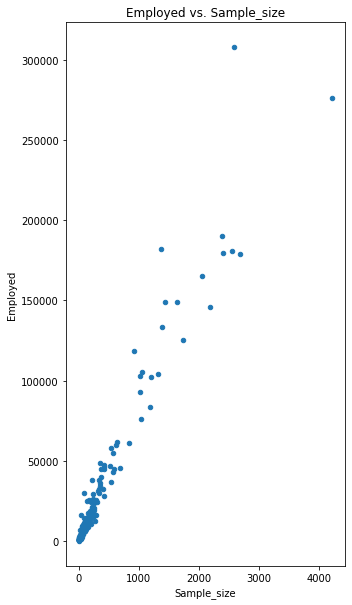

In [2]:
ax = recent_grads.plot(x = 'Sample_size', y = 'Employed', kind = 'scatter', figsize = (5,10))
ax.set_title('Employed vs. Sample_size')

Plot different columns against each other to find possible correlation:

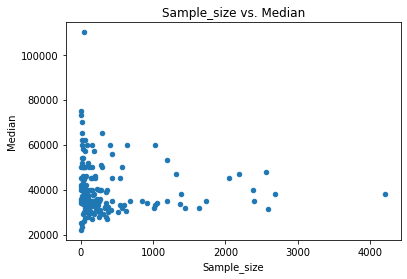

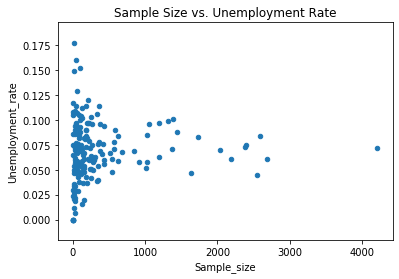

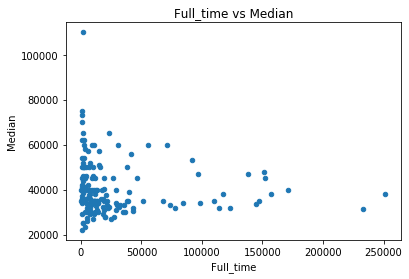

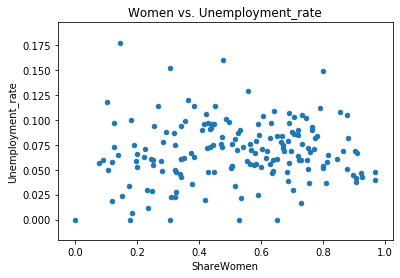

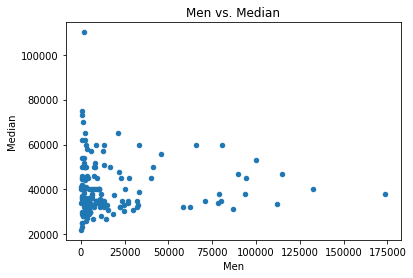

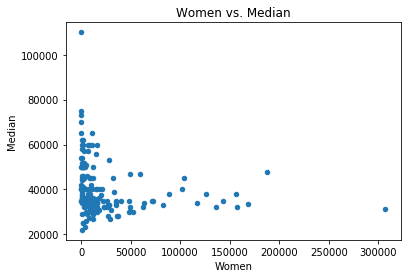

In [3]:
recent_grads.plot('Sample_size', 'Median', kind = 'scatter', title = 'Sample_size vs. Median')
recent_grads.plot('Sample_size', 'Unemployment_rate', kind = 'scatter', title = 'Sample Size vs. Unemployment Rate')
recent_grads.plot('Full_time', 'Median', kind = 'scatter', title = 'Full_time vs Median')
recent_grads.plot('ShareWomen', 'Unemployment_rate', kind = 'scatter', title = 'Women vs. Unemployment_rate')
recent_grads.plot('Men', 'Median', kind = 'scatter', title = 'Men vs. Median')
recent_grads.plot('Women', 'Median', kind = 'scatter', title = 'Women vs. Median')

### Interpretation:
* People in more popular majors seem to be making less money
* People in majors with a majority of women make less money
* More full time working alumni does not correlate with more money

## Scatter plots for visualizing data:

Can be used effectively to quickly spot possible correlations in datasets with many different columns. These can then be investigated further. Scatter plots are also useful for finding clusters of data points as well as to find outliers in the data. 

# Histograms

Plot histogram to get an overview over the typical amount of participants in the study per major:

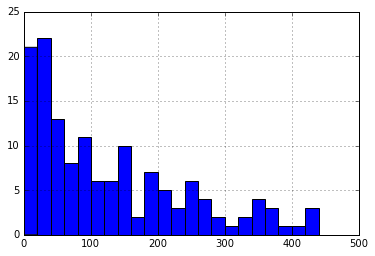

In [7]:
recent_grads['Sample_size'].hist(bins = 25, range = (0, 500))

For most majors the sample size is below 50

Histogram of the median income:

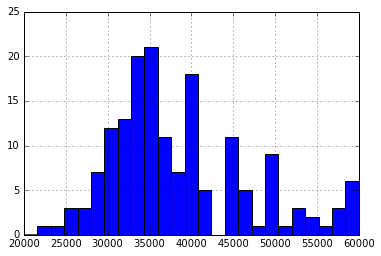

In [9]:
recent_grads['Median'].hist(bins = 25, range = (20000,60000))

The median salary for most of the majors in the study is between 30,000 and 40,000 dollars a year.

Histogram of majors with a majority of women vs those with a majority of men:

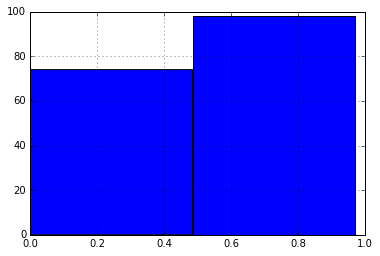

In [12]:
recent_grads['ShareWomen'].hist(bins = 2)

-> 100/170 majors are predominantly female

Histogram of median income between 20,000 and 50,000 USD:

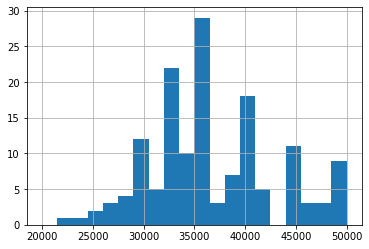

In [4]:
recent_grads['Median'].hist(range = (20000,50000), bins = 20)

-> The most common median income is around 35000-3600 USD

## Histograms for visualizing data:

Histograms are very useful to gain a first understanding of a new dataset. They allow someone who is new to a dataset to quickly gain an insight on which values are most common and how a group of values is made up.

# Scatter Matrix

Scatter matrix women vs men:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223B367C390>,
      dtype=object)

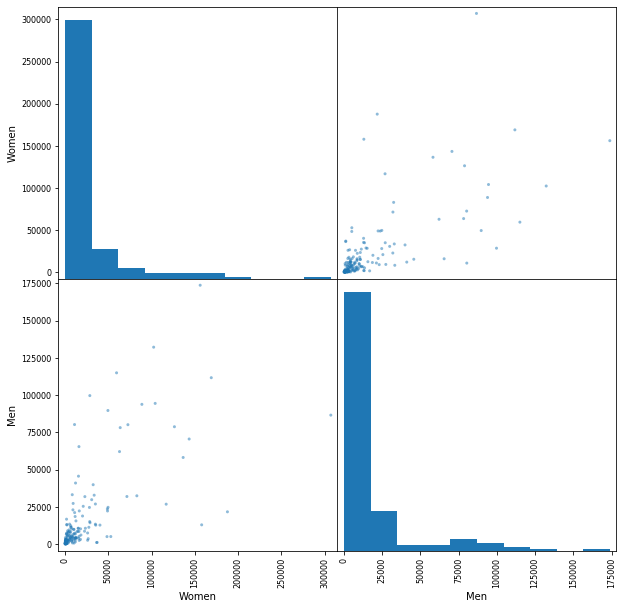

In [6]:
pd.plotting.scatter_matrix(recent_grads[['Women', 'Men']], figsize = (10,10))

There is no correlation. This is not surprising, since in this graph, the raw number of women is plotted against the raw number of men of a given major. Every major has a varying gender ratio as well as a varying sample size. But the goal of this project was to get comfortable with data visualization and to be able to spot when correlation occurs. So examples with no correlation are valid as well.

Scatter matrix of the sample size vs. median income

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0a882ca20>,
      dtype=object)

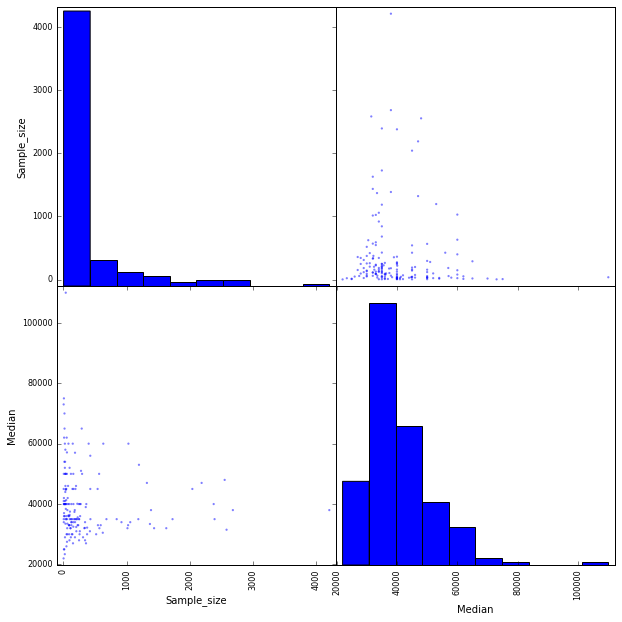

In [24]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size','Median']],figsize = (10,10))

Also no correlation between amount of participants from a certain major and their median income.

A 3x3 matrix scatter plot and histogram combination looking for correlations in the `Sample_size`, `Median` and `Unemployment_rate` columns. One would expect correlation between the median income and the unemployment rate, since unemployed people generally don't make very much income and fields where there is a surplus in graduates lead to a higher unemployment rate and to more graduates applying for the same job, which could allow the employer to hire employees at a lower income.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0a86e1a20>,
      dtype=object)

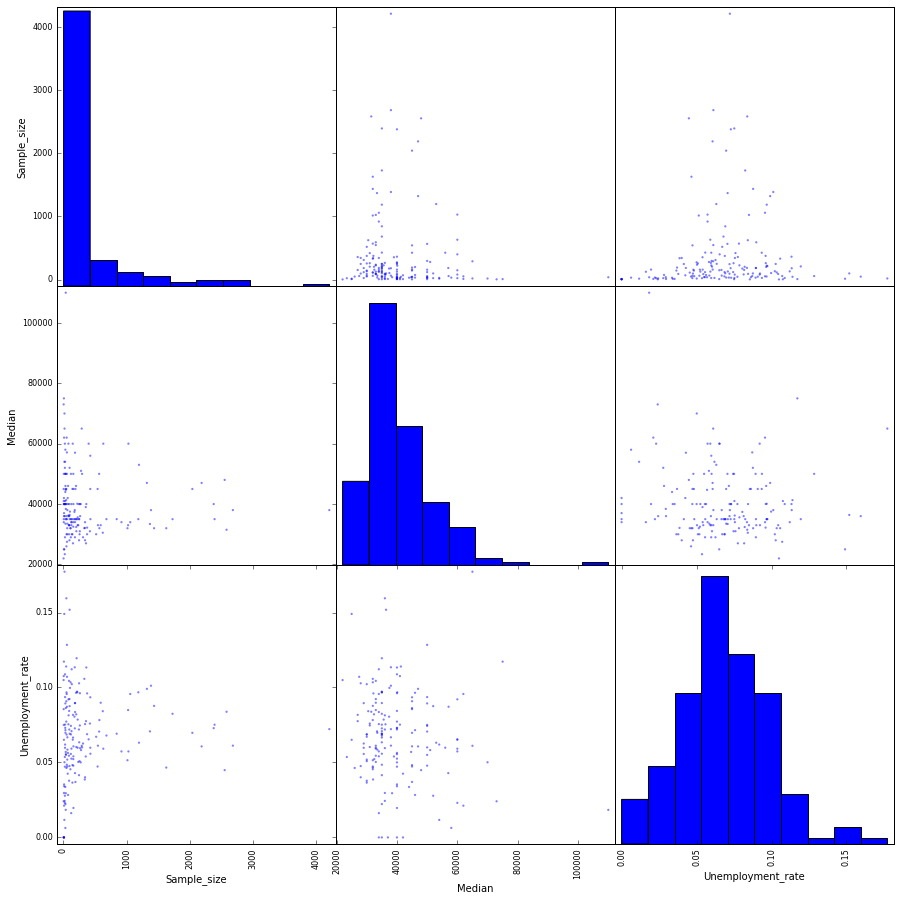

In [27]:
pd.plotting.scatter_matrix(recent_grads[['Sample_size','Median', 'Unemployment_rate']],figsize = (15,15))

## Interpretation:
Interestingly there appears to be absolutely no correlation between unemployment rate and median salary. This could possibly be because the unemployment rate is in general very low at around 5% (see bottom right). This might impact the median of the income less than the difference in incomes of the individual majors. It is also not clear how unemployed participants are treated in the data or if their unemployment benefits are even considered when calculating the median or if the median income is calculated only from those participants that are working.

## Scatter matrices to visualize data:

Scatter matrices can be useful to show complex interactions within a dataset, but they quickly become overwhelming and to cluttered, especially for someone who is confronted with a certain dataset for the first time

# Bar Plots

Use bar plots to show ratio of women in different majors:

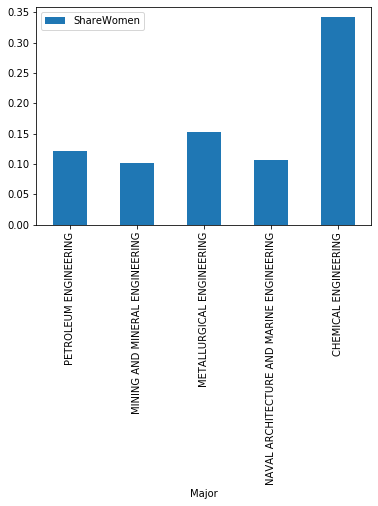

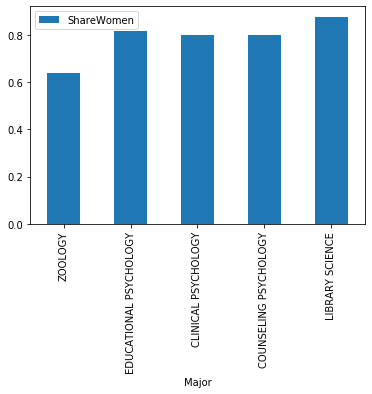

In [7]:
recent_grads[:5].plot.bar(x = 'Major', y = 'ShareWomen')
recent_grads[-5:].plot.bar(x = 'Major', y = 'ShareWomen')

Bar plots on unemployment rate of different majors:

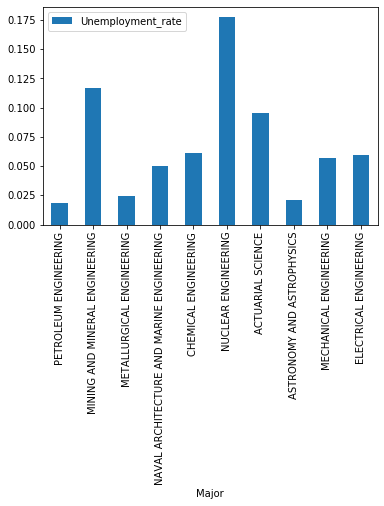

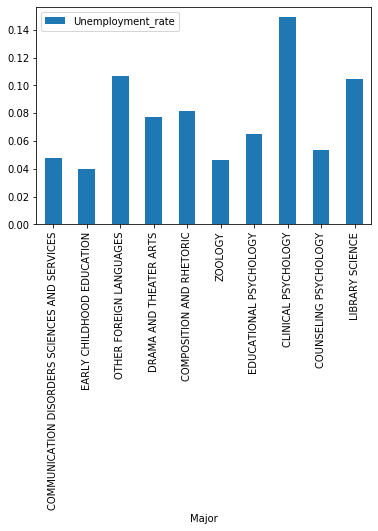

In [9]:
recent_grads[:10].plot.bar(x = 'Major', y = 'Unemployment_rate')
recent_grads[-10:].plot.bar(x = 'Major', y = 'Unemployment_rate')

## Bar plots to visualize data:

Bar plots can show information quickly and intuitively, but are very limited in the amount of information they can show, since comparing many data points at the same time quickly makes them overwhelming. The last two plots for example are already too cluttered. They also show that labeling the data can be challenging and if done incorrectly make the plot look overwhelming and unpleasing. 
Bar plots also have the challenge, that in a lot of cases people only use them to compare data relative to each other, while losing sight of the absolute values. For example plotting the height of different men where the smallest man is 1.9m and all the others are over 2m would at first glance imply that the 1.9m man is short, even though he is already pretty tall. For this reason plotting absolute scales into the bar plot can make them easier to interpret. In this example a horizontal bar of average male height may give more context to the graph.